In [1]:
from flu_matrix_completion import *

# Load in data from papers on H3N2 strains and antigenic mapping
Primarily using `HI_data_tables` class to keep track of data in a SQL datatables kind of way.

In [2]:
# Load in antisera-virus data as pd.DataFrames
HI_df = pd.read_csv("data/fonville_2014.csv", index_col='sampleID')
antisera_df = pd.read_csv("data/fonville_2014_antisera_table.csv", index_col='sampleID')

## Add data to HI_data_tables object
flu_data_tables = HI_data_tables() # Create HI_data_tables object
flu_data_tables.add_HI_data(HI_df=HI_df,
                            antisera_df=antisera_df) # Add data from Tal's ad Rong's original paper
flu_data_tables.compute_virus_dates() # Call compute_virus_dates method to compute years of virus

In [3]:
# antisera_df.groupID.unique()
# fonville_2014 = ['TableS1', 'TableS3', 'TableS5', 'TableS6', 'TableS13', 'TableS14']
# flu_data_tables.select_HI_data_by_group(group=fonville_2014).to_csv("data/fonville_2014.csv")
# antisera_df.iloc[[i in fonville_2014 for i in antisera_df['groupID']]].to_csv("data/fonville_2014_antisera_table.csv")

### How to use `HI_data_tables.select_HI_data_by_group` method

Text(0.5, 0.98, 'HI Heatmap for fonville ferrets and H3N2 Strains')

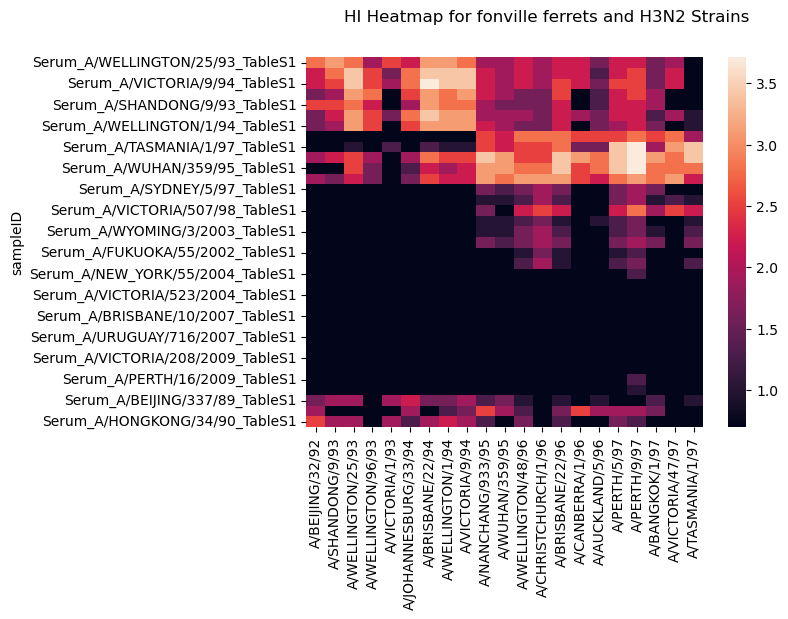

In [4]:
sns.heatmap(flu_data_tables.select_HI_data_by_group(group='TableS1').dropna(axis=1))
plt.suptitle('HI Heatmap for fonville ferrets and H3N2 Strains')

Text(0.5, 0.98, 'HI Heatmap for fonville children and H3N2 Strains')

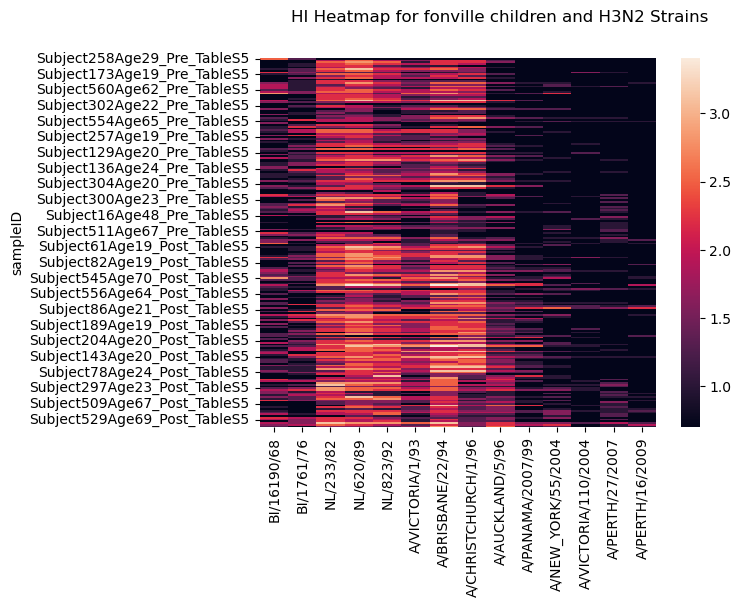

In [5]:
sns.heatmap(flu_data_tables.select_HI_data_by_group(group='TableS5').dropna(axis=1))
plt.suptitle('HI Heatmap for fonville children and H3N2 Strains')

# Perform table-wise comparisons for each data group

In [13]:
comparisons_obj = transferability_comparisons(HI_data_tables=flu_data_tables)
comparisons_obj.train_comparison_trees(train_trees=50, best_trees=5)
# comparisons_obj.plot_comparisons(save_to='figs/fonville_hinojosa_ertesvag_train1best1_comparison_plot.png', alpha=0.4)

In [7]:
# other_comparisons_obj.save_data("models/fonville_hinojosa_ertesvag_train1best1_comparison_data.pkl")

In [8]:
# other_comparisons_obj = transferability_comparisons(HI_data_tables=flu_data_tables)
# other_comparisons_obj.load_data("models/fonville_hinojosa_ertesvag_train1best1_comparison_data.pkl")

# Compute ODRs for each table-wise comparison of models

In [16]:
comparisons_obj.compute_comparison_virus_ODR_df_dict()

In [17]:
comparisons_obj.plot_comparisons_with_ODRs(save_to='figs/fonville_2014_comparison_plot_w_ODRs_train50_best5.png', s=100,  alpha=0.5)

# See how combining trees trained on different datasets can impact performance

### Compute `comparison_combiner_dict`

In [20]:
comparisons_obj.compute_comparison_combiner_dict()

### Visualize how model trained on TableS13 performs for predicting HI for TableS14 viruses

error: 1.8179615381774388


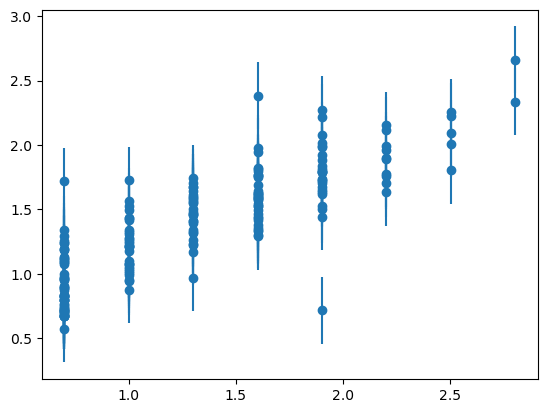

In [21]:
preds, errs = combine_predictions(target_virus_name='A/AUCKLAND/5/96',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS13'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS13 TO TableS14']['A/AUCKLAND/5/96']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

### Visualize how combining models trained on 'TableS13', 'TableS1', and 'TableS3'  affects performance when predicting HI for TableS14 viruses
Error goes down quite a bit!

error: 1.3597923639418292


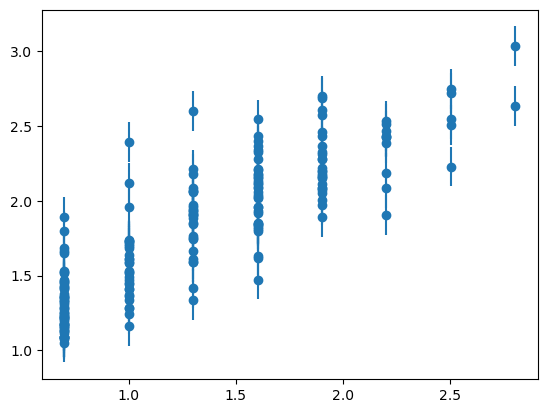

In [22]:
preds, errs = combine_predictions(target_virus_name='A/AUCKLAND/5/96',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS13', 'TableS1', 'TableS3'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS13 TO TableS14']['A/AUCKLAND/5/96']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) # hmmm, adding datasets did seem to improve error!. Funny

### S3 to S14

error: 1.067754520252317e+19


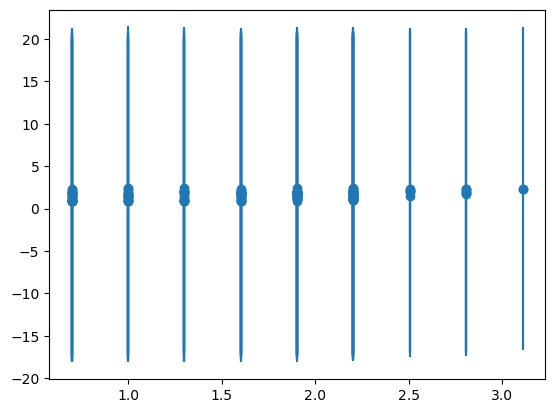

In [24]:
preds, errs = combine_predictions(target_virus_name='NL/620/89',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS3'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS3 TO TableS14']['NL/620/89']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
preds, errs = combine_predictions(target_virus_name='NL/620/89',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS1'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS1 TO TableS14']['NL/620/89']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
# comparisons_obj.compute_comparison_virus_ODR_df_dict()

### TableS1 to TableS14 Virus HI Prediction Benchmark

error: 1.924432480070008


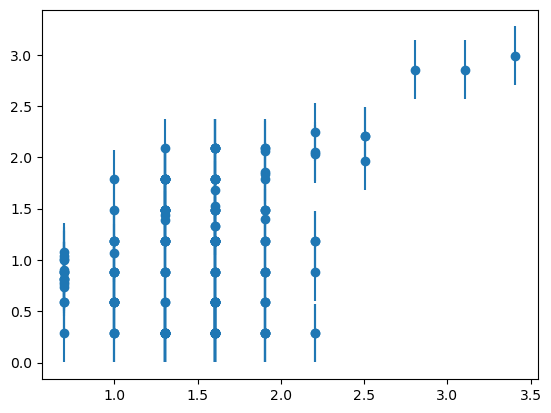

In [37]:
preds, errs = combine_predictions(target_virus_name='A/VICTORIA/110/2004',
                                  target_table_name='TableS14',
                                  source_table_names=['TableS1'],
                                  comparison_combiner_dict=comparisons_obj.comparison_combiner_dict)
HAI_measurements, _, _ = comparisons_obj.comparison_combiner_dict['TableS1 TO TableS14']['A/VICTORIA/110/2004']['error_bar_data']
y = np.log10(preds)
yerr = [errs]*len(HAI_measurements)
plt.errorbar(HAI_measurements,y, yerr=yerr, fmt='o')

print("error:", 10**errs) 

In [ ]:
# other_comparisons_obj.plot_comparisons_with_ODRs(save_to='figs/fonville_hinojosa_ertesvag_train1best1_comparison_plot_w_ODRs.png', alpha=0.4)